In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_n = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_n)        
%matplotlib inline

In [3]:
for dirname,_,filenames in os.walk('C:/Users/Lee Jong Ann/Desktop/Celebrity'):
    for filename in filenames: 
        print(os.path.join(dirname,filename))


C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_0.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_1.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_10.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_100.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_101.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_102.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_103.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_104.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_105.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_106.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_107.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_108.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_109.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_11.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoung\boyoung_110.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\boyoun

C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_338.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_339.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_34.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_340.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_341.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_342.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_343.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_344.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_345.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_346.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_347.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_348.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_349.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_35.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_350.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_351.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\Ilin\Ilin_352.jpg
C:/Users/Lee Jon

C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_67.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_670.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_671.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_672.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_673.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_674.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_675.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_676.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_677.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_678.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_679.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_68.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_680.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_681.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_682.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_683.jpg
C:/Users/Lee Jong Ann/Desktop/Celebrity\suzi\suzi_684.jpg
C:/Users/Lee Jon

In [4]:

import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19
import cv2
import os
import random
import tensorflow as tf

Using TensorFlow backend.
C:\Users\Lee Jong Ann\anaconda3\envs\second\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lee Jong Ann\anaconda3\envs\second\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lee Jong Ann\anaconda3\envs\second\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lee Jong Ann\a

In [5]:
labels = ['suzi','moon','boyoung','Naeon','emma','Ilin']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                cvt_img_arr = cv2.cvtColor(img_arr,cv2.COLOR_RGB2BGR)
                resized_arr = cv2.resize(cvt_img_arr, (img_size, img_size))# Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [6]:
data = get_data("C:/Users/Lee Jong Ann/Desktop/Celebrity")


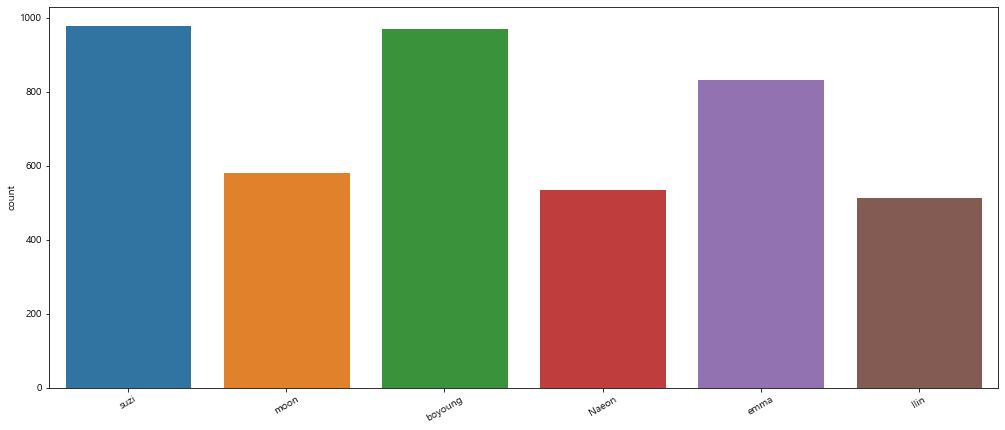

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(17,7)

l = []
for i in data: 
    l.append(labels[i[1]])  
sns.set_style('dark')
plt.sca(ax)
plt.xticks(rotation=30)
sns.countplot(l,ax=ax)

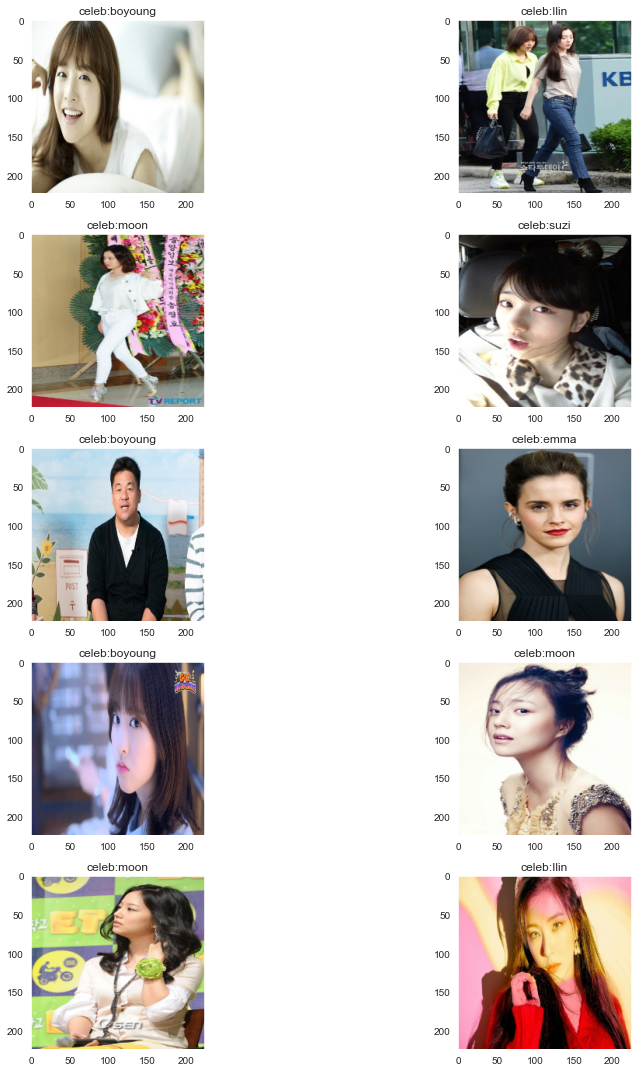

In [8]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('celeb:'+labels[data[l][1]])
        
plt.tight_layout()

In [9]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [10]:
# Normalize the data
x = np.array(x) / 255

In [11]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [12]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [26]:
pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")
pre_trained_model.trainable = True

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(6, activation='softmax')])
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 27654     
Total params: 20,052,038
Trainable params: 4,747,270
Non-trainable params: 15,304,768
_________________________________________________________________


In [27]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.6, min_lr=0.1)

In [28]:
history = model.fit(x_train,y_train, batch_size = 64 , epochs = 15 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])


Train on 3537 samples, validate on 885 samples
Epoch 1/15
3537/3537 [==============================] - 91s 26ms/step - loss: 1.8279 - accuracy: 0.2248 - val_loss: 1.7646 - val_accuracy: 0.2305
Epoch 2/15
3537/3537 [==============================] - 50s 14ms/step - loss: 1.7060 - accuracy: 0.2754 - val_loss: 1.6888 - val_accuracy: 0.2938
Epoch 3/15
3537/3537 [==============================] - 54s 15ms/step - loss: 1.6229 - accuracy: 0.3277 - val_loss: 1.6560 - val_accuracy: 0.3096
Epoch 4/15
3537/3537 [==============================] - 53s 15ms/step - loss: 1.5161 - accuracy: 0.3964 - val_loss: 1.6225 - val_accuracy: 0.3446
Epoch 5/15
3537/3537 [==============================] - 62s 18ms/step - loss: 1.3368 - accuracy: 0.4795 - val_loss: 1.6280 - val_accuracy: 0.3503
Epoch 6/15
3537/3537 [==============================] - 54s 15ms/step - loss: 1.1402 - accuracy: 0.5688 - val_loss: 1.5947 - val_accuracy: 0.3650
Epoch 7/15
3537/3537 [==============================] - 50s 14ms/step - loss

In [29]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

885/885 [==============================] - 11s 13ms/step
Loss of the model is -  3.0787231534214343
885/885 [==============================] - 8s 9ms/step
Accuracy of the model is -  44.293785095214844 %


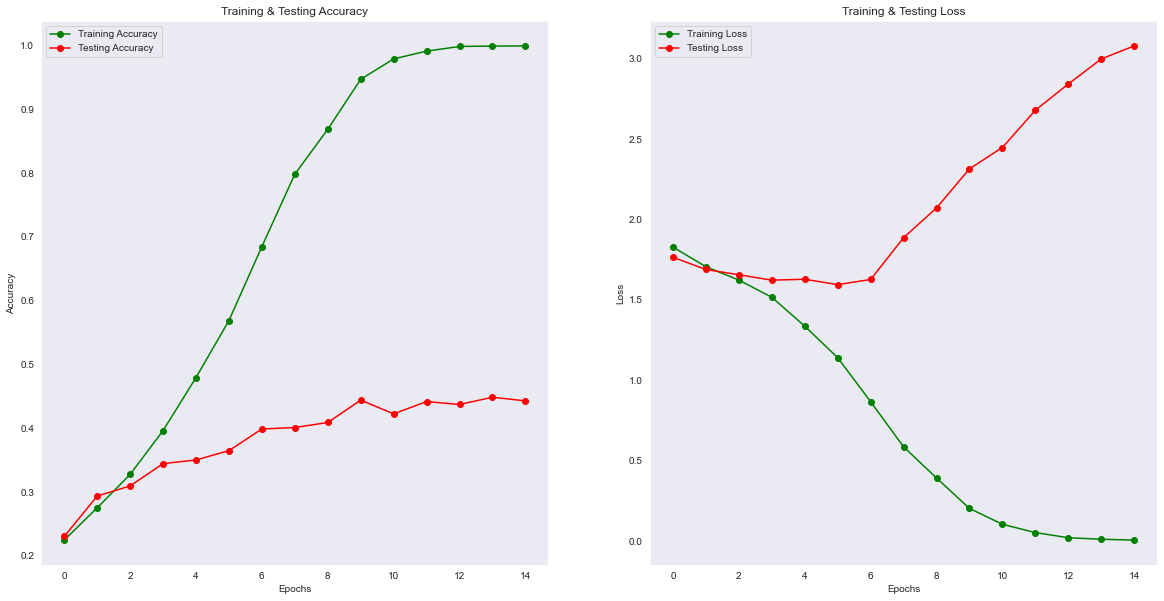

In [31]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [32]:
predictions = model.predict_classes(x_test)
predictions[:5]

array([1, 4, 0, 4, 0], dtype=int64)

In [33]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [34]:
print(classification_report(y_test_inv, predictions, target_names = labels))

              precision    recall  f1-score   support

        suzi       0.53      0.47      0.50       199
        moon       0.36      0.44      0.40       113
     boyoung       0.44      0.48      0.46       192
       Naeon       0.40      0.32      0.36       112
        emma       0.53      0.52      0.53       172
        Ilin       0.29      0.31      0.30        97

    accuracy                           0.44       885
   macro avg       0.43      0.42      0.42       885
weighted avg       0.45      0.44      0.44       885



In [35]:
cm = confusion_matrix(y_test_inv,predictions)
cm

array([[93, 26, 27, 25, 13, 15],
       [17, 50, 18,  5, 14,  9],
       [28, 22, 93,  6, 30, 13],
       [21, 15, 20, 36,  6, 14],
       [ 3, 15, 35,  7, 90, 22],
       [12,  9, 19, 11, 16, 30]], dtype=int64)

In [36]:
cm = pd.DataFrame(cm , index = labels , columns = labels)

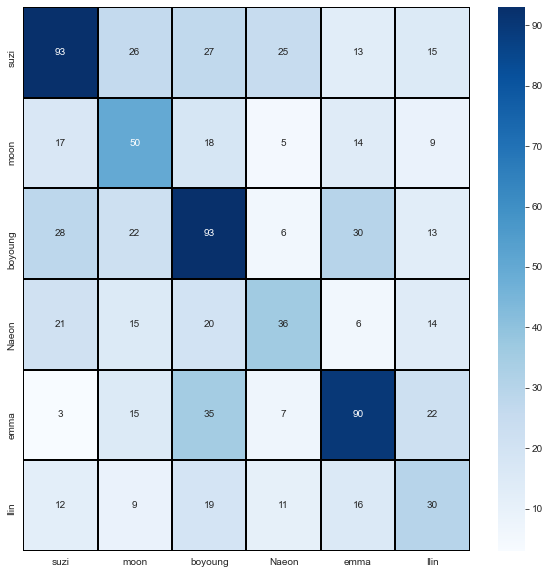

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

In [38]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == predictions[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

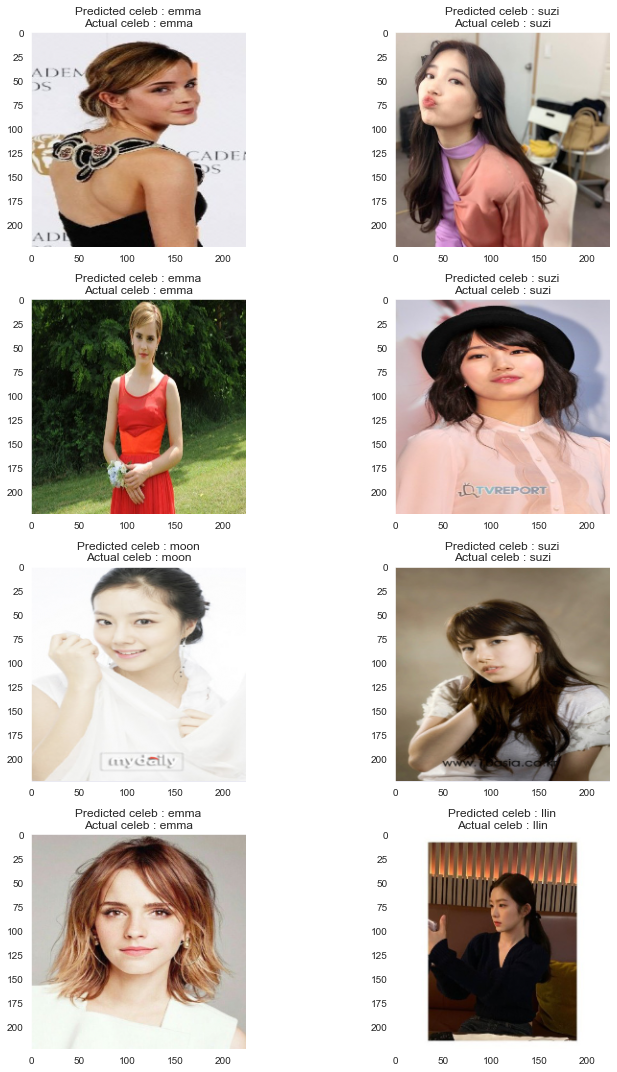

In [39]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted celeb : "+ labels[predictions[prop_class[count]]] +"\n"+"Actual celeb : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1

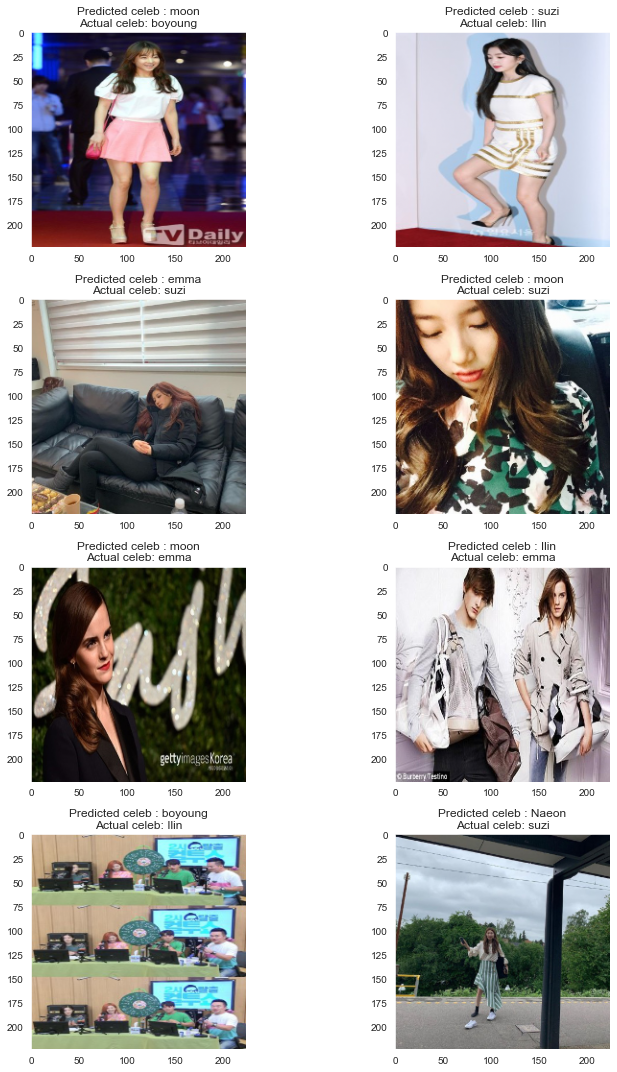

In [40]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted celeb : "+labels[predictions[mis_class[count]]]+"\n"+"Actual celeb: "+labels[y_test_inv[mis_class[count]]])
        plt.tight_layout()
        count+=1